In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [3]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역,승차,234.0
1,2008-01-01,150.0,서울역,승차,-420.0
2,2008-01-01,150.0,서울역,승차,-318.0
3,2008-01-01,150.0,서울역,승차,-161.0
4,2008-01-01,150.0,서울역,승차,-205.0
5,2008-01-01,150.0,서울역,승차,13.0
6,2008-01-01,150.0,서울역,승차,538.0
7,2008-01-01,150.0,서울역,승차,632.0
8,2008-01-01,150.0,서울역,승차,604.0
9,2008-01-01,150.0,서울역,승차,808.0


In [4]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [5]:
df['name']

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [6]:
s = df['name']
s

0           서울역
1           서울역
2           서울역
3           서울역
4           서울역
5           서울역
6           서울역
7           서울역
8           서울역
9           서울역
10          서울역
11          서울역
12          서울역
13          서울역
14          서울역
15          서울역
16          서울역
17          서울역
18          서울역
19          서울역
20           시청
21           시청
22           시청
23           시청
24           시청
25           시청
26           시청
27           시청
28           시청
29           시청
           ... 
21227830     수진
21227831     수진
21227832     수진
21227833     수진
21227834     수진
21227835     수진
21227836     수진
21227837     수진
21227838     수진
21227839     수진
21227840     모란
21227841     모란
21227842     모란
21227843     모란
21227844     모란
21227845     모란
21227846     모란
21227847     모란
21227848     모란
21227849     모란
21227850     모란
21227851     모란
21227852     모란
21227853     모란
21227854     모란
21227855     모란
21227856     모란
21227857     모란
21227858     모란
21227859     모란
Name: name, Length: 2122

In [7]:
s = list(set(s))
s

['산성',
 '석촌',
 '서울역',
 '오금',
 '송파',
 '마천',
 '까치산',
 '성신여대입구',
 '동대문역사문화공원',
 '남구로',
 '남한산성입구',
 '선릉',
 '독립문',
 '문래',
 '미아사거리',
 '이대',
 '대치',
 '학여울',
 '신길',
 '역촌',
 '미아',
 '삼각지',
 '잠원',
 '잠실나루',
 '연신내',
 '마장',
 '디지털미디어시티',
 '여의도',
 '제기동',
 '경찰병원',
 '대청',
 '고덕',
 '행당',
 '명동',
 '반포',
 '부천시청',
 '사가정',
 '광나루',
 '구의',
 '망원',
 '상월곡',
 '건대입구',
 '안국',
 '상계',
 '명일',
 '중계',
 '서울대입구',
 '용마산',
 '내방',
 '숭실대입구',
 '신금호',
 '회현',
 '한성대입구',
 '홍대입구',
 '우장산',
 '서대문',
 '신흥',
 '동묘앞',
 '성수',
 '낙성대',
 '화곡',
 '효창공원앞',
 '사당',
 '아현',
 '마곡',
 '구로디지털단지',
 '온수',
 '역삼',
 '용답',
 '독바위',
 '청구',
 '을지로3가',
 '한양대',
 '논현',
 '구파발',
 '경복궁',
 '동대문',
 '신풍',
 '숙대입구',
 '충정로',
 '발산',
 '남성',
 '모란',
 '종합운동장',
 '새절',
 '남태령',
 '공덕',
 '여의나루',
 '강남',
 '신당',
 '종로3가',
 '영등포시장',
 '뚝섬유원지',
 '삼성',
 '도봉산',
 '도곡',
 '개화산',
 '신사',
 '어린이대공원',
 '시청',
 '이촌',
 '서초',
 '남부터미널',
 '길동',
 '광명사거리',
 '합정',
 '수서',
 '올림픽공원',
 '양천구청',
 '용두',
 '금호',
 '고속터미널',
 '대림',
 '신정네거리',
 '양재',
 '쌍문',
 '상왕십리',
 '상봉',
 '안암',
 '종각',
 '석계',
 '철산',
 '잠실새내',
 '방화',
 '신대방',
 '하

In [8]:
len(s)

241

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [10]:
s[1]

'석촌'

In [11]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [12]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [13]:
data1 = df[df['name']==s[1]]

In [14]:
data1.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [15]:
data1

,date,number,name,div,a
5000,2008-01-01,2816.0,석촌,승차,73.0
5001,2008-01-01,2816.0,석촌,승차,31.0
5002,2008-01-01,2816.0,석촌,승차,34.0
5003,2008-01-01,2816.0,석촌,승차,26.0
5004,2008-01-01,2816.0,석촌,승차,-2.0
5005,2008-01-01,2816.0,석촌,승차,39.0
5006,2008-01-01,2816.0,석촌,승차,47.0
5007,2008-01-01,2816.0,석촌,승차,77.0
5008,2008-01-01,2816.0,석촌,승차,112.0
5009,2008-01-01,2816.0,석촌,승차,17.0


In [16]:
len(data1)

78520

In [17]:
data1.shape

(78520, 5)

In [20]:
data1 = df[df['name']=='강남']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

                date  number name div        a
620       2008-01-01   222.0   강남  승차    945.0
621       2008-01-01   222.0   강남  승차    314.0
622       2008-01-01   222.0   강남  승차    -64.0
623       2008-01-01   222.0   강남  승차   -205.0
624       2008-01-01   222.0   강남  승차   -806.0
625       2008-01-01   222.0   강남  승차   -405.0
626       2008-01-01   222.0   강남  승차   -336.0
627       2008-01-01   222.0   강남  승차   -474.0
628       2008-01-01   222.0   강남  승차   -628.0
629       2008-01-01   222.0   강남  승차   -584.0
630       2008-01-01   222.0   강남  승차   -661.0
631       2008-01-01   222.0   강남  승차   -751.0
632       2008-01-01   222.0   강남  승차   -839.0
633       2008-01-01   222.0   강남  승차   -723.0
634       2008-01-01   222.0   강남  승차   -198.0
635       2008-01-01   222.0   강남  승차    800.0
636       2008-01-01   222.0   강남  승차   1650.0
637       2008-01-01   222.0   강남  승차   1725.0
638       2008-01-01   222.0   강남  승차    507.0
639       2008-01-01   222.0   강남  승차    -58.0
5860      200

In [21]:
data

array([[  945.],
       [  314.],
       [  -64.],
       ...,
       [ 3692.],
       [ 1239.],
       [-1845.]], dtype=float32)

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

In [ ]:
model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=16)
p = model.predict(x_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 512)         1052672   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
___________

In [ ]:
np.savetxt("강남_test.csv", p, delimiter=",")

In [20]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.clf()
print(mean_squared_error(y_test, p))

In [21]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file : 
#     json_file.write(model_json)
# model.save_weights("model.h5")
# print("Saved model to disk")

In [23]:
from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [23]:
# # Plot training & validation loss values

# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

NameError: name 'hist' is not defined

In [ ]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Text(0.5, 0, 'Time')

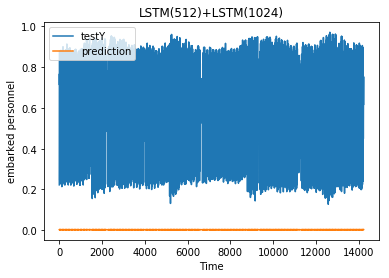

In [27]:
p = model.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')


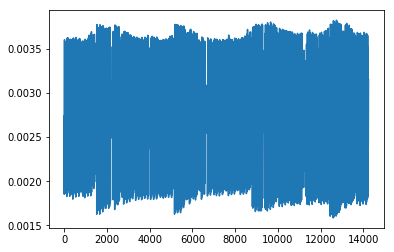

In [30]:
plt.plot(p)

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import math
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# 마지막으로 모델의 기술을 시각적으로 표시하기 위해 열차 및 테스트 데이터 세트 모두에 대해 모델을 사용하여 예측을 생성 할 수 있습니다.

# 데이터 세트가 준비되었으므로, x 축에서 원래 데이터 세트와 정렬되도록 예측을 이동해야합니다. 준비가 완료되면 데이터가 그려져 원본 데이터 세트가 파란색으로 표시되고 교육 데이터 세트의 녹색 예측이 표시되며 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시됩니다.

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [1]:
p

NameError: name 'p' is not defined